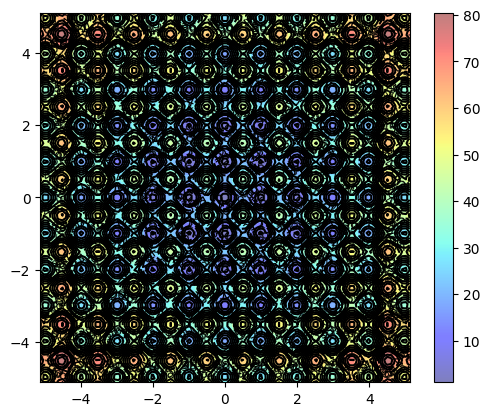

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X, Y = np.meshgrid(np.linspace(-5.12, 5.12, 100),
                   np.linspace(-5.12, 5.12, 100))
# Rastringin
Z = X**2 - 10*np.cos(2*np.pi*X) + Y**2 - 10*np.cos(2*np.pi*Y) + 20

# Contour
contours = plt.contour(X, Y, Z, 30, colors='black')
plt.clabel(contours, inline=True, fontsize=10)

plt.imshow(Z, extent=[-5.12, 5.12, -5.12, 5.12, 30], origin='lower', cmap='jet', alpha=0.5)
plt.colorbar()
plt.show()
# plt.show()

Global Best Position:  [0.99580874 0.00121715]
Best Fitness Value:  0.9953962742114157
Average Particle Best Fitness Value:  0.9953962742114157
Number of Generation:  99


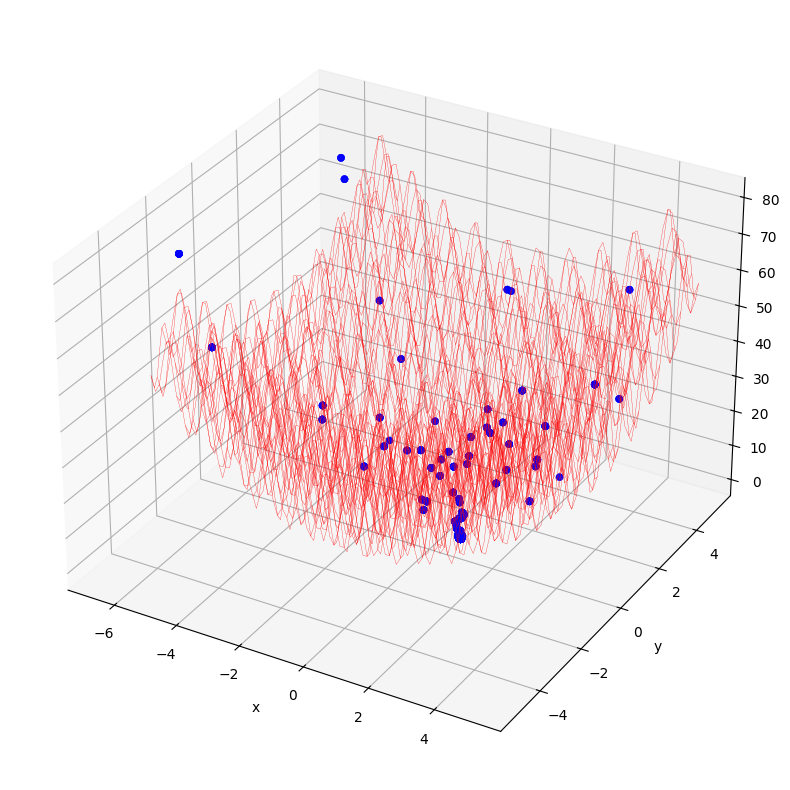

In [2]:
#https://towardsdatascience.com/swarm-intelligence-coding-and-visualising-particle-swarm-optimisation-in-python-253e1bd00772
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
# Objective function
# Rastrigin's function
from matplotlib.animation import FFMpegWriter


def Rastrigin(x1,x2):
   return 20 + x1**2 + x2**2 - 10*(np.cos(2*np.pi*x1) + np.cos(2*np.pi*x2))
def update_velocity(particle,velocity,pbest,gbest,w_min=0.5,max=1.0,c=0.1):
  # Initialise new velocity array
  num_particle=len(particle)
  new_velocity=np.array([0.0 for i in range(num_particle)])
  # Randomly generate r1,r2 and inertia weight from normal distribution
  r1=random.uniform(0,max)
  r2=random.uniform(0,max)
  w=0.0
  c1=2.0
  c2=2.0
  # Calculate new velocity
  for i in range(num_particle):
    new_velocity[i]=w*velocity[i]+c1*r1*(pbest[i]-particle[i])+c2*r2*(gbest[i]-particle[i])
  return new_velocity
def update_position(particle,velocity):
  # Move particles by adding velocity
  new_particle=particle+velocity
  return new_particle
def pso_2d(population,dimension,position_min,position_max,generation,fitness_criterion,ax,images):
  # Initialisation
  # Population
  particles=[[random.uniform(position_min,position_max) for j in range(dimension)] for i in range(population)]
  # Particle's best position
  pbest_position=particles
  # Fitness
  pbest_fitness=[Rastrigin(p[0],p[1]) for p in particles]
  # Index of the best particle
  gbest_index=np.argmin(pbest_fitness)
  # Global best particle position
  gbest_position=pbest_position[gbest_index]
  # Velocity (starting from 0 speed)
  velocity=[[0.0 for j in range(dimension)] for i in range(population)]

  # Loop for the number of generation
  for t in range(generation):
    # Stop if the average fitness value reached a predefined success criterion
    if np.average(pbest_fitness) <= fitness_criterion:
      break
    else:
      for n in range(population):
        # Update the velocity of each particle
        velocity[n]=update_velocity(particles[n],velocity[n],pbest_position[n],gbest_position)
        # Move the particles to new position
        particles[n]=update_position(particles[n],velocity[n])

        image=ax.scatter3D([
                          particles[n][0] for n in range(population)],
                         [particles[n][1] for n in range(population)],
                         [Rastrigin(particles[n][0],particles[n][1]) for n in range(population)],c='b')
        images.append([image])

    # Calculate the fitness value
    pbest_fitness=[Rastrigin(p[0],p[1]) for p in particles]
    # Find the index of the best particle
    gbest_index=np.argmin(pbest_fitness)
    # Update the position of the best particle
    gbest_position=pbest_position[gbest_index]



  # Print the results
  print('Global Best Position: ',gbest_position)
  print('Best Fitness Value: ',min(pbest_fitness))
  print('Average Particle Best Fitness Value: ',np.average(pbest_fitness))
  print('Number of Generation: ',t)


population=10
dimension=2
position_min=-5.12
position_max=5.12
generation=100
fitness_criterion=10e-2


# Plotting prepartion
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

x=np.linspace(position_min,position_max,80)
y=np.linspace(position_min,position_max,80)
X,Y=np.meshgrid(x,y)
Z= Rastrigin(X,Y)
ax.plot_wireframe(X,Y,Z,color='r',linewidth=0.2)

# Animation image placeholder
images=[]


pso_2d(population,dimension,position_min,position_max,generation,fitness_criterion,ax,images)


# Generate the animation image and save
animated_image=animation.ArtistAnimation(fig,images)
plt.show()
